### Exploration and Analysis of King County house prices

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read in the data
houses = pd.read_csv('kc_house_data.csv', na_filter = False)

In [3]:
#summarize the data
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


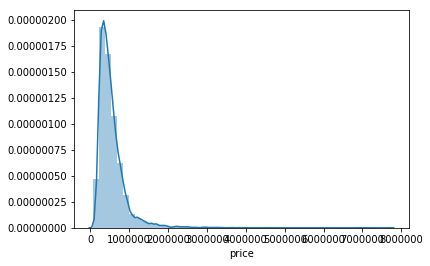

In [6]:
#histogram of house prices
sns.distplot(houses['price']);

In [7]:
#skewness and kurtosis
print('Skewness: ' + str(houses['price'].skew()))
print('Kurtosis: ' + str(houses['price'].kurt()))

Skewness: 4.024069144684712
Kurtosis: 34.58554043194243


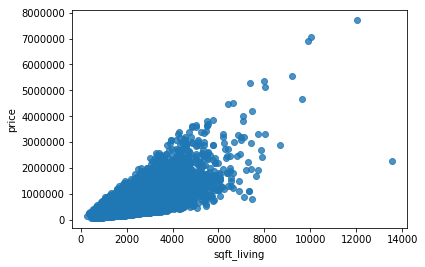

In [8]:
#relationship with sqft_living
sns.regplot(x = houses['sqft_living'], y = houses['price'], fit_reg = False);

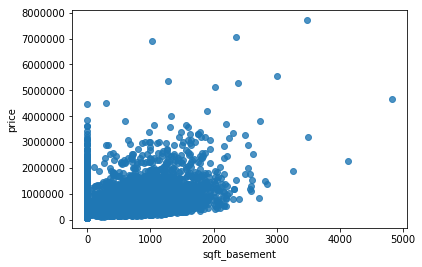

In [9]:
#relationship sqft_basement
sns.regplot(x = houses['sqft_basement'], y = houses['price'], fit_reg = False);

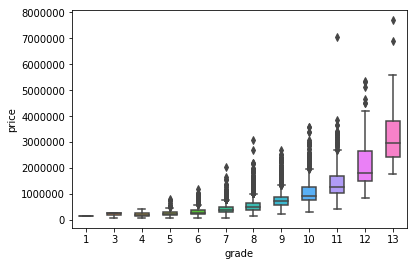

In [10]:
#relationship with grade
sns.boxplot(x = houses['grade'], y = houses['price'], width = 0.5, saturation = 1);

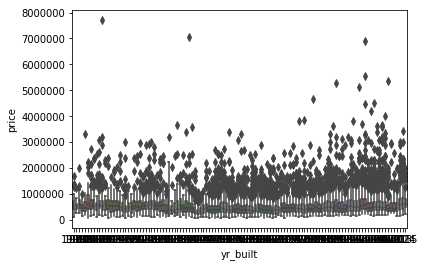

In [11]:
#relationship with yr_built
sns.boxplot(x = houses['yr_built'], y = houses['price'], width = 0.5, saturation = 1);

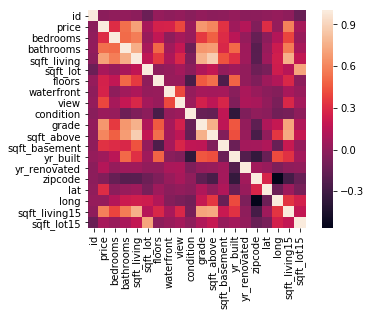

In [12]:
#heatmap of correlations
corrmat = houses.corr()
sns.heatmap(corrmat, square = True)

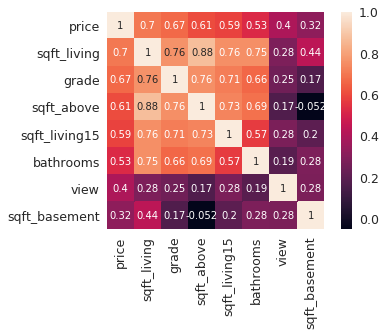

In [13]:
#zoomed in heatmap of correlations
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(houses[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values);

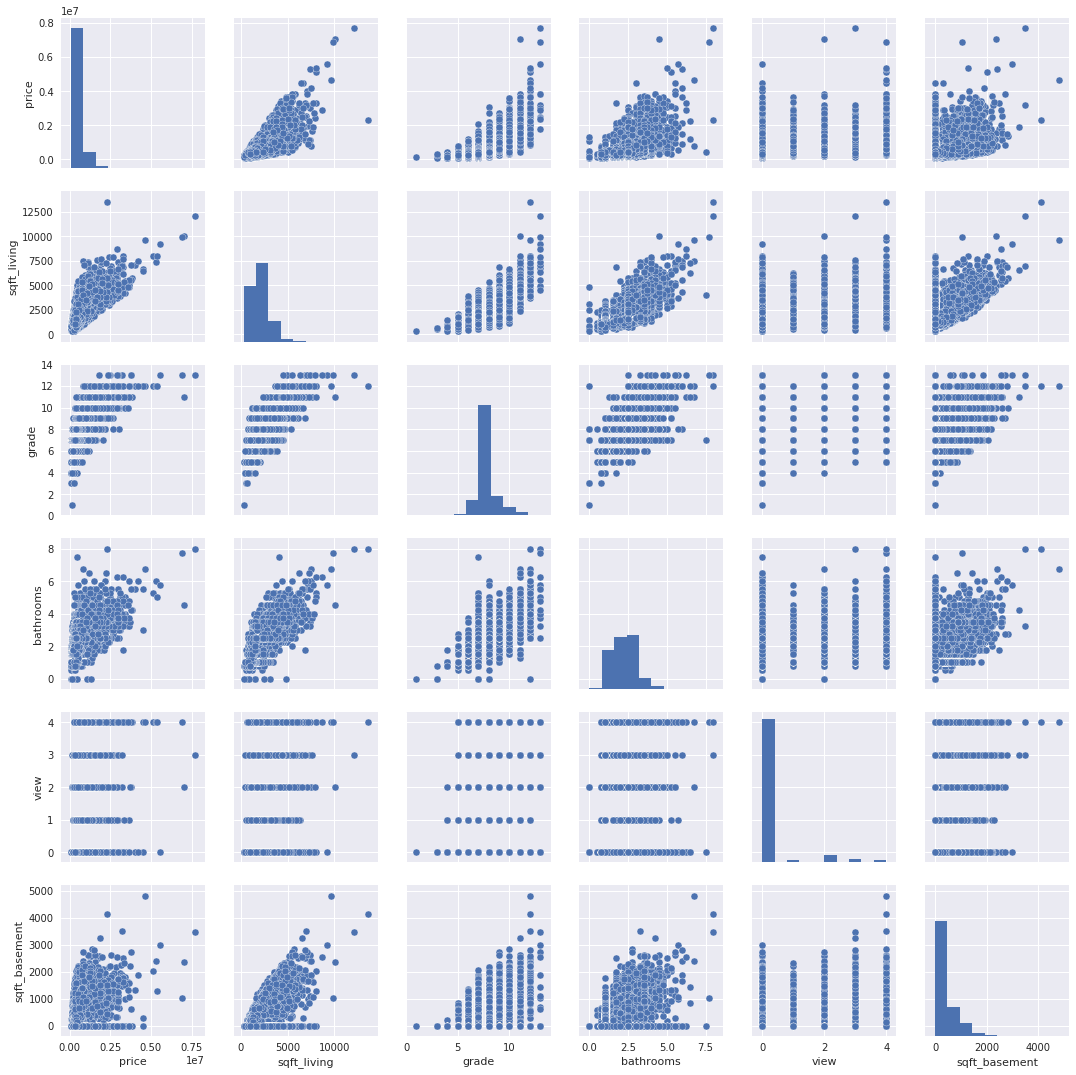

In [14]:
#pairplot
sns.set()
cols = ['price','sqft_living', 'grade', 'bathrooms', 'view', 'sqft_basement']
sns.pairplot(houses[cols], size = 2.5);

In [15]:
#missing data
total = houses.isnull().sum().sort_values(ascending = False)
percent = (houses.isnull().sum()/houses.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['total', 'percent'])
missing_data

,total,percent
sqft_lot15,0,0.0
view,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0


In [16]:
#standardize the data and look for outliers
price_scaled = StandardScaler().fit_transform(houses['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range = price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of dist')
print(low_range)
print('outer range (high) of dist')
print(high_range)

outer range (low) of dist
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]
outer range (high) of dist
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


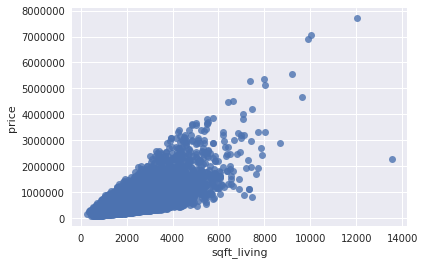

In [17]:
#bivariate analysis price/sqft_living
sns.regplot(x = houses['sqft_living'], y = houses['price'], fit_reg = False)

Let's remove the two biggest houses

In [18]:
#delete point
houses.sort_values('sqft_living', ascending = False)[:2]
houses = houses.drop(houses[houses['id'] == 1225069038].index)
houses = houses.drop(houses[houses['id'] == 6762700020].index)

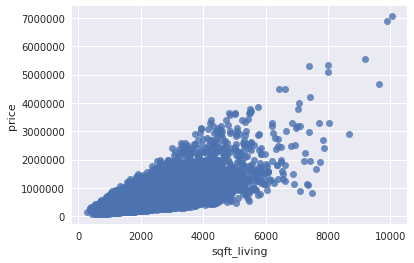

In [19]:
#bivariate analysis price/sqft_living with outliers removed
sns.regplot(x = houses['sqft_living'], y = houses['price'], fit_reg = False)

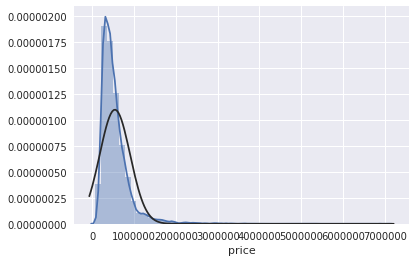

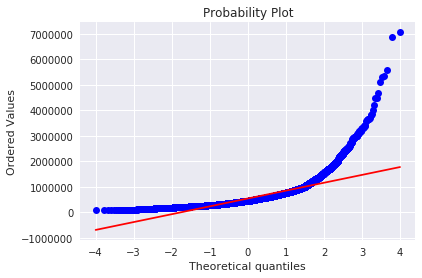

In [20]:
#histogram and normal probability plot for price
sns.distplot(houses['price'], fit = norm);
fig = plt.figure()
res = stats.probplot(houses['price'], plot = plt);

price is not normal. Kurtosis is very high and  data is skewed, normal plot doesn't follow the diagonal line.

In [21]:
#apply log transformation to price
houses['price'] = np.log(houses['price'])

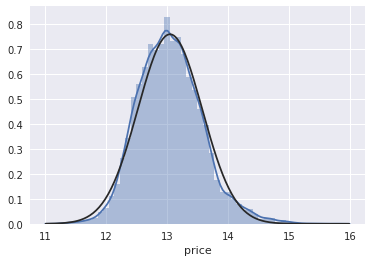

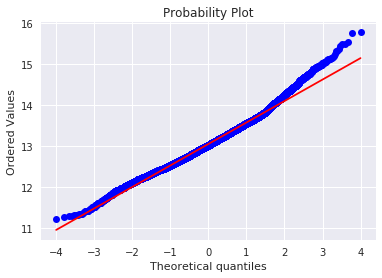

In [22]:
#transformed histogram and normal probability plot for price
sns.distplot(houses['price'], fit = norm);
fig = plt.figure()
res = stats.probplot(houses['price'], plot = plt)

Still a bit skewed, but much better

In [23]:
cols

['price', 'sqft_living', 'grade', 'bathrooms', 'view', 'sqft_basement']

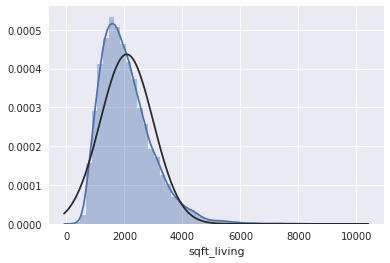

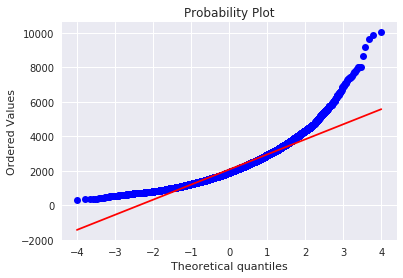

In [24]:
#histogram and normal probability plot for sqft_living
sns.distplot(houses['sqft_living'], fit = norm);
fig = plt.figure()
res = stats.probplot(houses['sqft_living'], plot = plt)

In [25]:
#apply log transformation to sqft_living
houses['sqft_living'] = np.log(houses['sqft_living'])

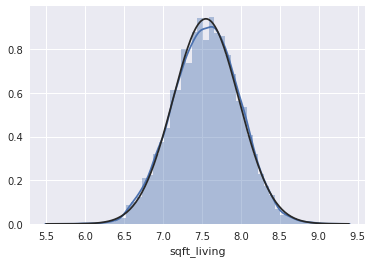

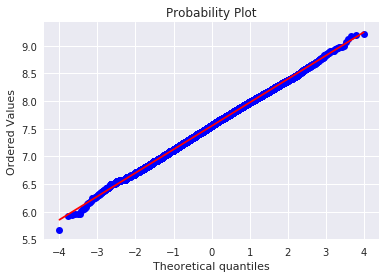

In [26]:
#transformed histogram and normal probability plot for sqft_living
sns.distplot(houses['sqft_living'], fit = norm);
fig = plt.figure()
res = stats.probplot(houses['sqft_living'], plot = plt)

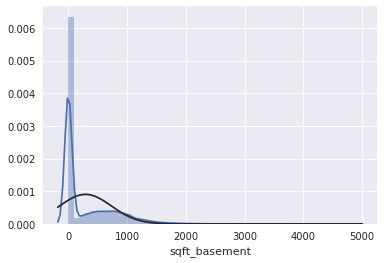

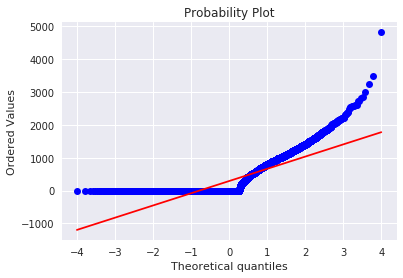

In [27]:
#histogram and normal probability plot for sqft_basement
sns.distplot(houses['sqft_basement'], fit = norm);
fig = plt.figure()
res = stats.probplot(houses['sqft_basement'], plot = plt)

In [28]:
#create column for new variable
houses['has_basement'] = [1 if h > 0 else 0 for h in houses['sqft_basement']]

In [29]:
#transform the data that has a basement
houses.loc[houses['has_basement'] == 1, 'sqft_basement'] = np.log(houses['sqft_basement'])

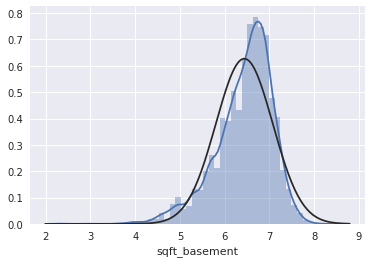

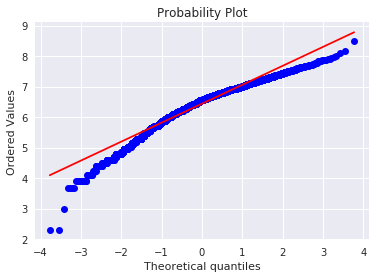

In [30]:
#transformed histogram and normal probability plot for sqft_living
#histogram and normal probability plot for sqft_basement
sns.distplot(houses[houses['sqft_basement'] > 0]['sqft_basement'], fit = norm);
fig = plt.figure()
res = stats.probplot(houses[houses['sqft_basement'] > 0]['sqft_basement'], plot = plt)

Still not normal, what to do?

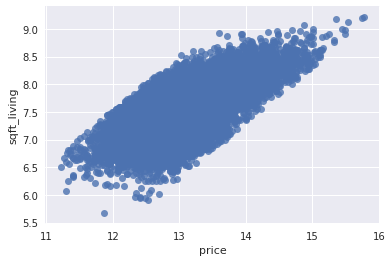

In [31]:
#check heterosckedasticity for price/sqft_living
sns.regplot(x = houses['price'], y = houses['sqft_living'], fit_reg = False)

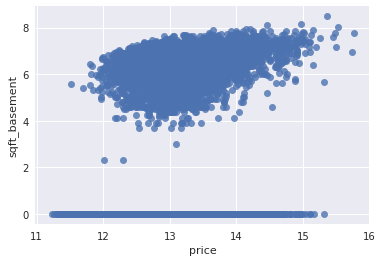

In [32]:
#check heterosckedasticity for price/sqft_basement
sns.regplot(x = houses['price'], y = houses['sqft_basement'], fit_reg = False)

sqft_basement is heteroskedastic.It's highly correlated with sqft_above so we won't use it in the regression

Will move forward with sqft_above: and view

In [33]:
#convert categorical variables into dummy
houses = pd.get_dummies(houses)